# 1. Data

Dataset: Bank Customer Churn Prediction
[Dataset Link](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/regression/'

/content/drive/MyDrive/regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'Churn_Modelling.csv'
df = pd.read_csv(csv_file_path)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Summary Statistics

In [ ]:
# Summary statistics for numeric columns
print(df.describe())


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

### Data Visualization

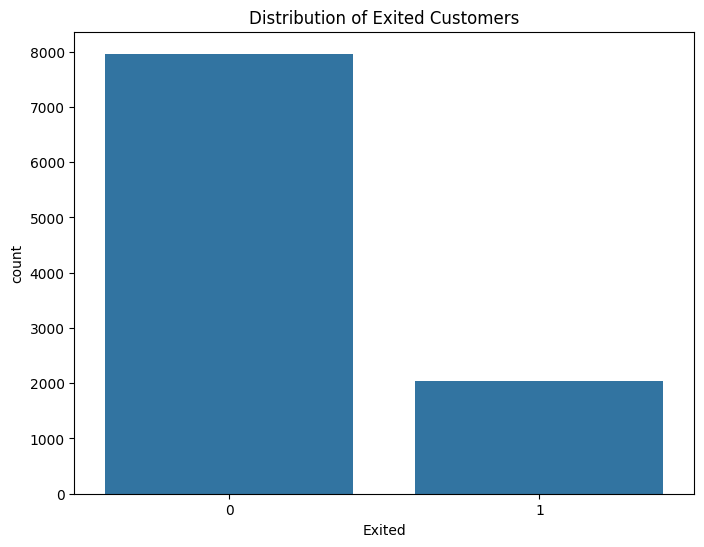

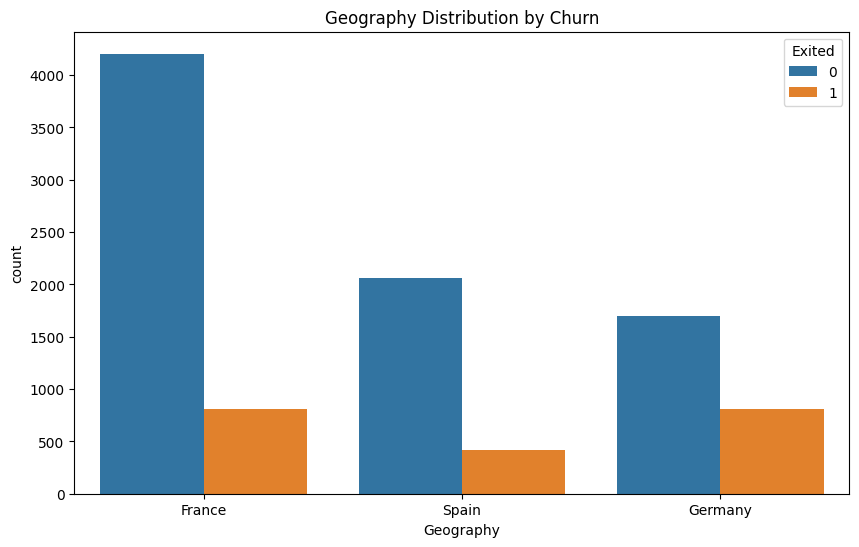

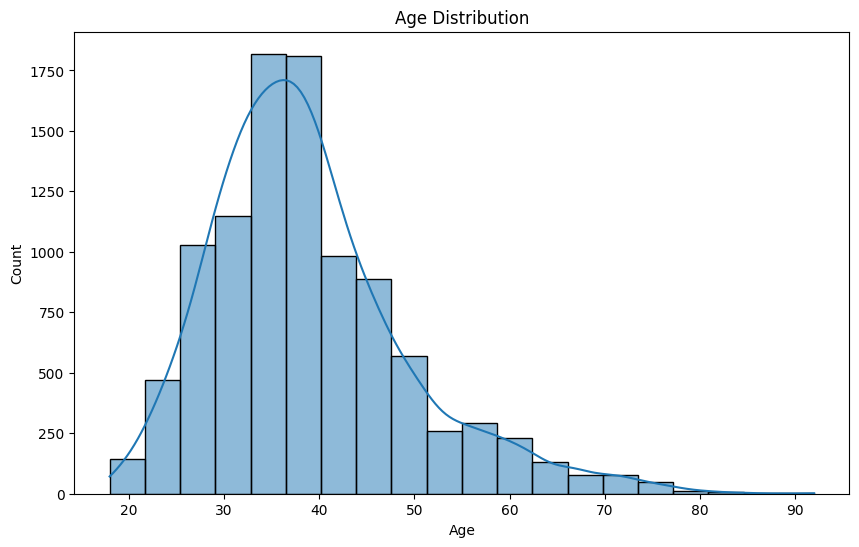

In [ ]:

# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited Customers')
plt.show()

# Categorical feature distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=df, hue='Exited')
plt.title('Geography Distribution by Churn')
plt.show()

# Numeric feature distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


### Data Integrity and Quality Check

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate records
print("Number of duplicates:", df.duplicated().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Number of duplicates: 0


### Class Imbalance Check

In [ ]:
# Check the distribution of target variable 'Exited'
print(df['Exited'].value_counts())


Exited
0    7963
1    2037
Name: count, dtype: int64


### Feature Importance

In [ ]:
# Drop non-essential columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Split the features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train your model (for feature importance)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Display feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance)


CreditScore          0.141698
Age                  0.240789
Tenure               0.080020
Balance              0.141823
NumOfProducts        0.132963
HasCrCard            0.018404
IsActiveMember       0.039498
EstimatedSalary      0.147718
Geography_Germany    0.026002
Geography_Spain      0.013038
Gender_Male          0.018047
dtype: float64


# 2. Model

### Import Libaries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Split Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Model

In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LogisticRegression()

### Make Predictions

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)


### Evaluate the Model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8005
Confusion Matrix:
[[1573   34]
 [ 365   28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



### Random forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.869
Confusion Matrix:
[[1559   48]
 [ 214  179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

